Definir librerias:

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import random
import operator

Función para imprimir información:

In [2]:
def imprime_informacion(G):
    n = len(nx.nodes(G))
    m = len(nx.edges(G))
    d = nx.diameter(G)
    densidad = nx.density(G)
    print("Informacion de la red: \n- nodos = " + str(n) +
          "\n- enlaces = " + str(m) +
          "\n- diámetro = " + str(d) +
         "\n- densidad = " + str(densidad))
    s = nx.info(G)
    print(s)

Función para graficar el mapa de calor de la red:

In [3]:
def mapa_calor_grado(G, nombre_red):
    degree_map = {node:nx.degree(G, node) for node in G.nodes()}
    max_degree = max(degree_map.values())
    min_degree = min(degree_map.values())
    colores_nodos = list(degree_map.values())
    mapa_color = plt.get_cmap('Greens')
    nx.draw(G, cmap=mapa_color, node_color=colores_nodos, with_labels=True)
    sm = plt.cm.ScalarMappable(cmap=mapa_color,norm=plt.Normalize(vmin = min_degree, vmax=max_degree))
    cbar = plt.colorbar(sm)
    cbar.set_label('Grado')
    plt.savefig(nombre_red + ".png")
    plt.show()
    plt.clf()

Función para determinar los componentes conectados:

In [4]:
def num_componentes_conectados(G):
    num_cc=nx.number_connected_components(G)
    return num_cc

Función para determinar la proporcióndel componente gigante:

In [5]:
def prop_componente_gigante(G):
    componentes_conectados=num_componentes_conectados(G)
    gcc =sorted(nx.connected_components(G))
    gc= G.subgraph(gcc[0])
    nodos=len(nx.nodes(G))
    nodosG=len(nx.nodes(gc))
    proporcion=nodosG/nodos
    return proporcion

Función para graficar dos funciones:

In [6]:

def grafica_funciones(titulo,f1_valores, f2_valores,f1_leyenda, f2_leyenda ,ejex_etiqueta, ejey_etiqueta,nombre):
    plt.title(titulo) #Se determina el titulo de la grafica con el argumento de la función "titulo"
    plt.plot(f1_valores, label=f1_leyenda)  #Grafica la primera funcion con los argumentos "f1_valores" & "label"
    plt.plot(f2_valores, label=f2_leyenda)  #Grafica la primera funcion con los argumentos "f2_valores" & "label"
    plt.xlabel(ejex_etiqueta) #Asigna una etiqueta al eje 'X'
    plt.ylabel(ejey_etiqueta) #Asigna una etiqueta al eje 'Y'
    plt.legend() #Agrega una leyenda a la grafica
    plt.savefig(nombre + ".png")

Función obtener el nodo con mayor Page Rank:

In [7]:
def nodo_PG(G):
    lista=nx.pagerank(G, alpha=0.85)
    nodo_mayor = max(lista.items(), key=operator.itemgetter(1))[0]
    return nodo_mayor

Función para hacer un ataque por Page Rank:

In [8]:
def ataque_pagerank(G):
    i=nodo_PG(G)
    G.remove_node (i)
    return G

Función para realizar ataques secuenciales:

In [9]:
def ataque_pagerank_secuencial(G,num_errores):
    num_cc_lista=list()
    prop_gc_lista=list()
    for i in range(num_errores):
        ataque_pagerank(G)
        num_cc_lista.append(num_componentes_conectados(G))
        prop_gc_lista.append(prop_componente_gigante(G))
    return (num_cc_lista, prop_gc_lista)

Creación de la red de escala libre:

In [10]:
red_escala_libre=nx.barabasi_albert_graph(100,5)
imprime_informacion(red_escala_libre)

Informacion de la red: 
- nodos = 100
- enlaces = 475
- diámetro = 4
- densidad = 0.09595959595959595
Name: 
Type: Graph
Number of nodes: 100
Number of edges: 475
Average degree:   9.5000


Creación de la red aleatoria:

In [11]:
red_aleatoria=nx.erdos_renyi_graph(100,0.1)
imprime_informacion(red_aleatoria)

Informacion de la red: 
- nodos = 100
- enlaces = 495
- diámetro = 4
- densidad = 0.1
Name: 
Type: Graph
Number of nodes: 100
Number of edges: 495
Average degree:   9.9000


Mapa de calor de la red aleatoria:

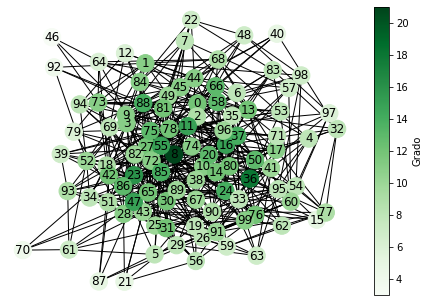

<Figure size 432x288 with 0 Axes>

In [12]:
mapa_calor_grado(red_aleatoria, "Red_aleatoria_calor")

Mapa de calor de la red de escala libre:

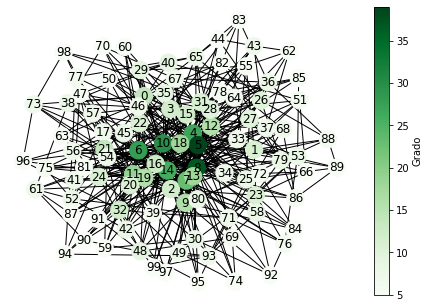

<Figure size 432x288 with 0 Axes>

In [13]:
mapa_calor_grado(red_escala_libre, "red_escala_libre_calor")

Simulación de 99 ataques secuenciales por Page Rank a una red de escala libre:

In [14]:
red_escala_libre_test = red_escala_libre.copy()
(num_cc_libre_test, prop_gc_libre_test) = ataque_pagerank_secuencial(red_escala_libre_test, 99)

Simulación de 99 ataques secuenciales por Page Rank a una red aleatoria:

In [15]:
red_aleatoria_test = red_aleatoria.copy()
(num_cc_aleatoria_test, prop_gc_aleatoria_test) = ataque_pagerank_secuencial(red_aleatoria_test, 99)

Gráfica de componentes conectados vs número de ataques:

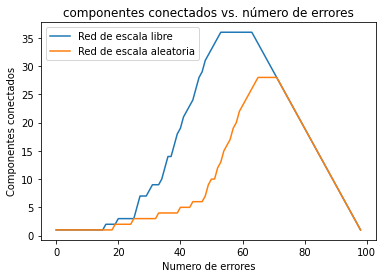

In [16]:
grafica_funciones("componentes conectados vs. número de errores",num_cc_libre_test, num_cc_aleatoria_test, "Red de escala libre", "Red de escala aleatoria" ,"Numero de errores","Componentes conectados","Grafica_ataque_componentes_secuencial")

Gráfica de Proporción del componente gigante vs número de ataques:

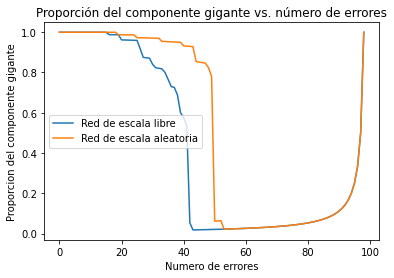

In [17]:
grafica_funciones("Proporción del componente gigante vs. número de errores",prop_gc_libre_test, prop_gc_aleatoria_test, "Red de escala libre", "Red de escala aleatoria" ,"Numero de errores","Proporcion del componente gigante","Grafica_ataque_componente_gigante_secuencial")